## The SIR model

The SIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; infectives, I, who have already caught the disease and infect susceptibles; and removed individuals, R. Since the disease is assumed not to be fatal, the sum $N=S+I+R$ remains constant. The rate at which the susceptibles get infected is 
$$
\lambda(t) = \frac{\beta I}{N}
$$
where the parameter $\beta$ is the probability of infection on contact. The infected individuals remove from the disease at a rate $\gamma$. Then, the ordinary differential equations of the SIR model are

\begin{align}
\dot S &= -\lambda(t)S \\
\dot I &= \lambda(t)I - \gamma I \\
\dot R &= \gamma I 
\end{align}

This example integrates the above equations to obtain what is called the **epidemic curve**: a plot of the number of susceptibles and infectives as a function of time. 

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

In [2]:
M = 1                  # the SIR model has no age structure
Ni = 1000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gIa   = 0.1            # removal rate of asymptomatic infectives 
gIs   = 0.1            # removal rate of symptomatic infectives 
alpha = 0              # fraction of asymptomatic infectives 
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate


Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no removed individuals initially 
S0  = N-(Ia0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 160;  Nt=160; 

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SIR(parameters, M, Ni)

# simulate model 
#data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)
data = model.simulator(np.concatenate((S0, Ia0, Is0)), contactMatrix, Tf, Nt) # another possibility

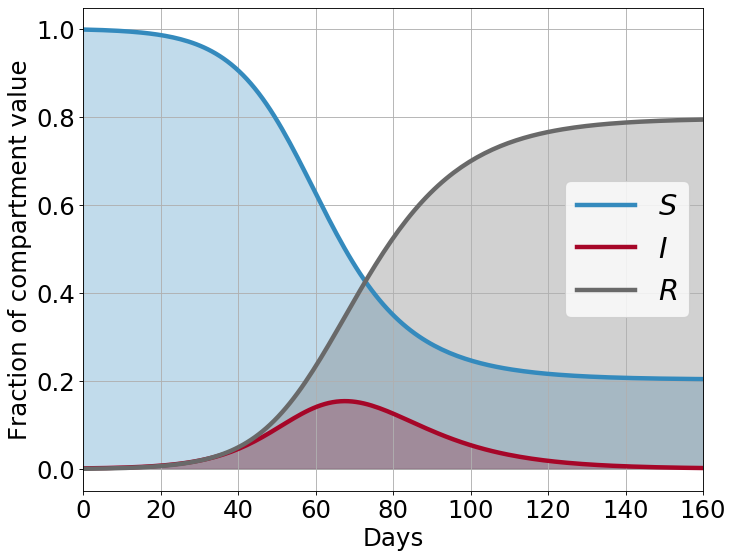

In [3]:
# plot the data and obtain the epidemic curve
S  = data['X'][:,0].flatten()
Ia = data['X'][:,1].flatten()
Is = data['X'][:,2].flatten()
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, Is/N, color='#A60628', alpha=0.3)
plt.plot(t, Is/N, '-', color='#A60628', label='$I$', lw=4)

R=N-S-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Fraction of compartment value')
plt.xlabel('Days');

## Plot the same epidemic curve using utils method

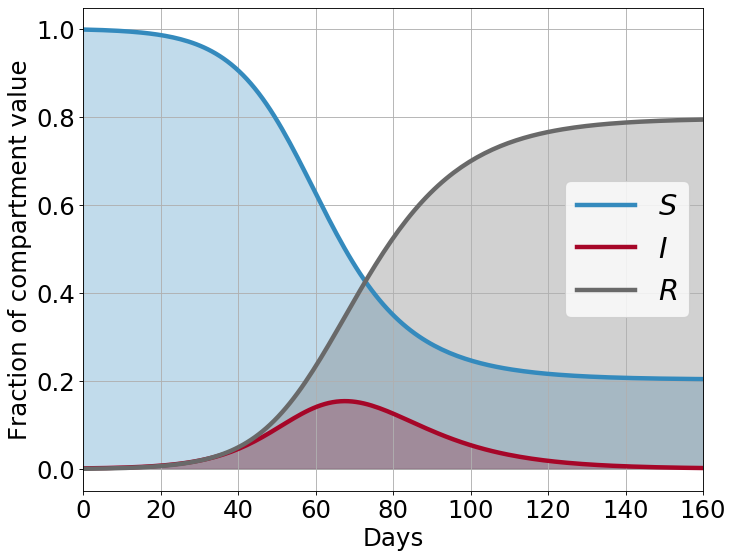

In [4]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)
#data = model.simulator(np.concatenate((S0, Ia0, Is0)), contactMatrix, Tf, Nt) # another possibility
pyross.utils.plotSIR(data)

## Plot the effective basic reproductive ratio $\mathcal R_0^{\text{eff}}(t)$ as a function of time

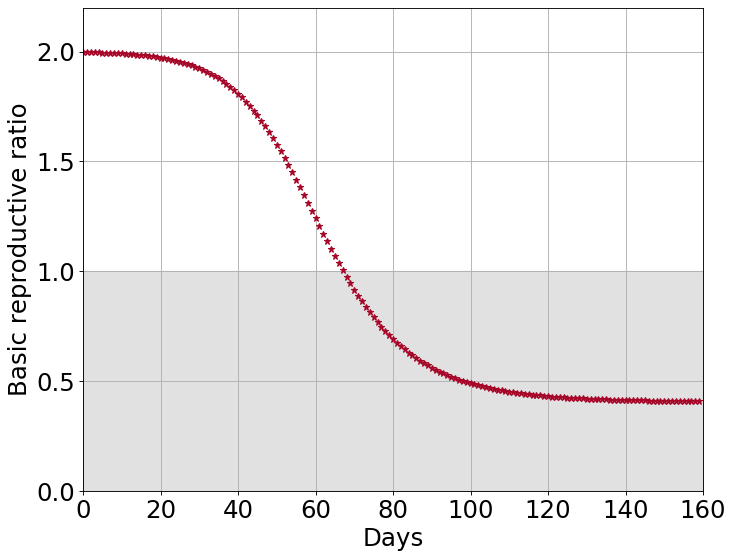

In [5]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

C=np.identity(M); contactMatrix = pyross.contactMatrix.SIR(0.25*C, 0.25*C, 0.25*C, 0.25*C)
r0de = contactMatrix.basicReproductiveRatio(data, state='dynamic')

plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.plot(r0de, '*', color='#A60628')
plt.xlabel('Days'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True);
plt.yticks(np.arange(0, 3, step=0.5)); plt.ylim(0,2.2);

---



## The SIR model with two age groups

The partitioning of the population can be refined to include other attributes relevant to the disease. One of the most important of these is the age. Let us assume we partition the population into two age groups, children and adults, and label them by the index $i=1,2$. Children can catch the infection from other children or from adults; likewise, adults can catch the infection from other adults or from children. Calling their respective rates of infection $\lambda_1(t)$ and $\lambda_2(t)$ we get
\begin{align}
\lambda_1(t) = \beta(C_{11}\frac{I_1}{N_1} + C_{12}\frac{I_2}{N_2})S_1\\
\lambda_2(t) = \beta(C_{21}\frac{I_1}{N_1} + C_{22}\frac{I_2}{N_2})S_2
\end{align}
where $C_{ij}$ are contact matrices, quantifying how much each age group interacts with the other. The ordinary differential equations of this age-structured SIR model are 

\begin{align}
\dot S_i &= -\lambda_i(t)S_i \\
\dot I_i &= \lambda(t)_iI_i - \gamma I_i \\
\dot R_i &= \gamma I_i 
\end{align}

Again, for each $i$ the sum $N_i = S_i + I_i + R_i$ remains constant. What do we expect qualitatively ? The group that has a greater rate will catch the disease faster and catch more of it. This depends on how the entries of the contact matrix are distributed. 

This example integrates the above equations to **epidemic curve** for both the children and the adults. We see that they have unequal rates of infection. 

In [6]:
M  = 2                  # the population has two age groups
N  =  1000000           # and this is the total population

beta  = 0.0131          # infection rate
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of asymptomatic infectives 
alpha = 0               # fraction of asymptomatic infectives 
fsa   = 1               # Fraction by which symptomatic individuals do not self isolate


Ni = np.zeros((M))      # population in each group
fi = np.zeros((M))      # fraction of population in age age group

# set the age structure
fi = np.array((0.25, 0.75)) 
for i in range(M):
    Ni[i] = fi[i]*N
    
# set the contact structure
C = np.array(([18., 9.], [3., 12.]))
    
    
Ia_0 = np.array((1,1))  # each age group has asymptomatic infectives
Is_0 = np.array((1,1))  # and also symptomatic infectives 
R_0  = np.array((0,0))  # there are no removed individuals initially
S_0  = Ni - (Ia_0 + Is_0 + R_0)


# matrix for linearised dynamics
L = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        L[i,j]=C[i,j]*Ni[i]/Ni[j]

L = (alpha*beta/gIs)*L

# the basic reproductive ratio
r0 = np.max(np.linalg.eigvals(L))

print("The basic reproductive ratio for these parameters is", r0)

The basic reproductive ratio for these parameters is 0.0


In [7]:
# duration of simulation and data file
Tf=200; Nf=2000; filename='this.mat'

# the contact structure is independent of time 
def contactMatrix(t):
    return C

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SIR(parameters, M, Ni)


# simulate model
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

In [8]:
IK = data.get('X')[:,2*M].flatten()
IA = data.get('X')[:,2*M+1].flatten()
t  = data.get('t') 

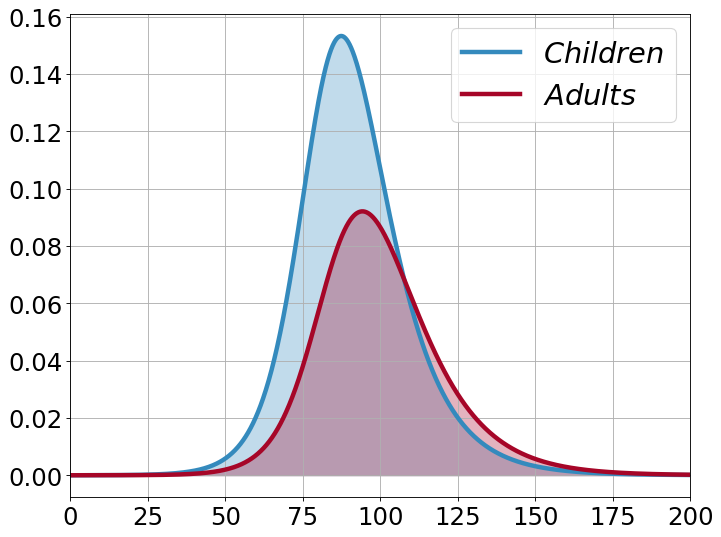

In [9]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, IK/Ni[0], color="#348ABD", alpha=0.3)
plt.plot(t, IK/Ni[0], '-', color="#348ABD", label='$Children$', lw=4)

plt.fill_between(t, 0, IA/Ni[1], color='#A60628', alpha=0.3)
plt.plot(t, IA/Ni[1], '-', color='#A60628', label='$Adults$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)